<a href="https://colab.research.google.com/github/SanghunOh/with_pandas/blob/main/codes/pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [5]:
# 결측치 확인
# titanic.info()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# 결측치 컬럼, 열 삭제
titanic = titanic.drop(columns=['deck', 'embark_town'])
titanic = titanic.dropna()
titanic.shape

(712, 13)

In [7]:
# age를 범위로 조정
titanic['age_range'] = (titanic['age']/10).astype('int')*10

In [9]:
# pibot_table 적용
titanic.pivot_table(index='class', columns='age_range', values='survived', aggfunc='count')

age_range,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


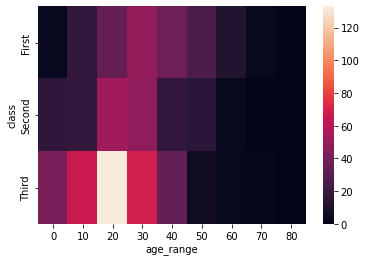

In [10]:
titanic_pivot = titanic.pivot_table(index='class', columns='age_range', values='survived', aggfunc='count')
sns.heatmap(titanic_pivot)